In [69]:
import pandas as pd   
import numpy as np

data = pd.read_csv("C:/Users/mraga/OneDrive/Desktop/Encryptix Internship/Task 3/Churn_Modelling.csv")
data.head(), data.isnull().sum(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0          1    15634602  Hargrave          619    France  Female   42   
 1          2    15647311      Hill          608     Spain  Female   41   
 2          3    15619304      Onio          502    France  Female   42   
 3          4    15701354      Boni          699    France  Female   39   
 4          5    15737888  Mitchell          850     Spain  Female   43   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1          1               1   
 1       1   83807.86              1          0               1   
 2       8  159660.80              3          1               0   
 3       1       0.00              2          0               0   
 4       2  125510.82              1          1               1   
 
    EstimatedSalary  Exited  
 0        101348.88       1  
 1        112542.58       0  
 2        113931.57       1  
 3         93826.63     

In [70]:
feature_cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = data[feature_cols]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [71]:
Y = data['Exited']
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [72]:
import matplotlib.pyplot as plt  
import seaborn as sns

data['Geography'].value_counts(), data['Geography'].index


(Geography
 France     5014
 Germany    2509
 Spain      2477
 Name: count, dtype: int64,
 RangeIndex(start=0, stop=10000, step=1))

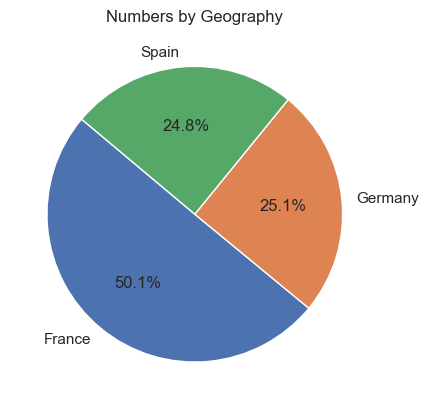

In [73]:
sizes = [5014, 2509, 2477]
labels = ['France', 'Germany', 'Spain']
sns.set_theme(style='whitegrid')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Numbers by Geography")
plt.show()

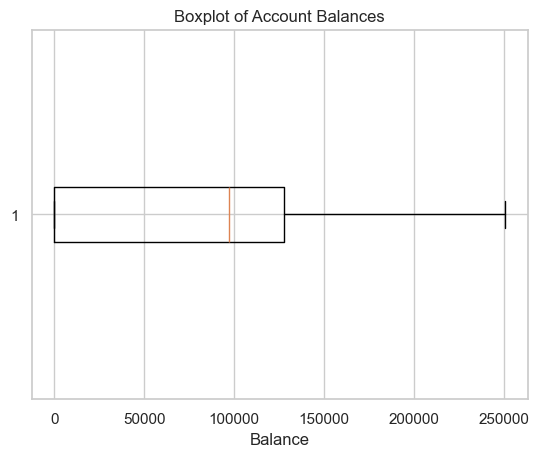

In [74]:
plt.boxplot(data['Balance'], vert=False)
plt.xlabel('Balance')
plt.title('Boxplot of Account Balances')
plt.show()

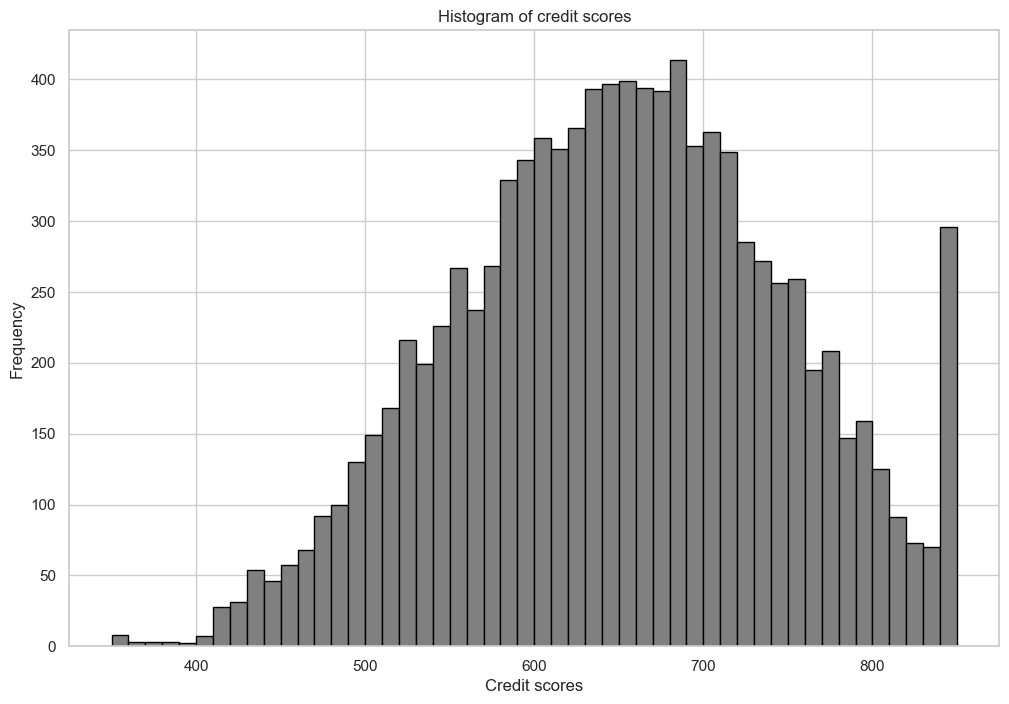

In [75]:
plt.figure(figsize=(12,8))
plt.hist(data['CreditScore'], bins=50, color='grey', edgecolor='black')
plt.title('Histogram of credit scores')
plt.xlabel('Credit scores')
plt.ylabel('Frequency')
plt.show()

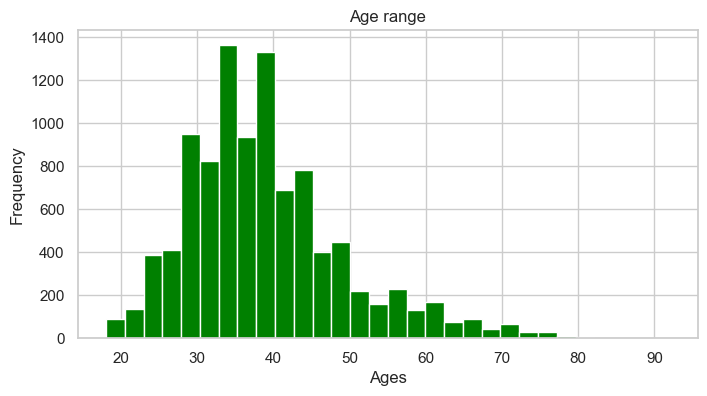

In [76]:
plt.figure(figsize=(8,4))
plt.hist(data['Age'], bins=30, color='green', edgecolor='white')
plt.title('Age range')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

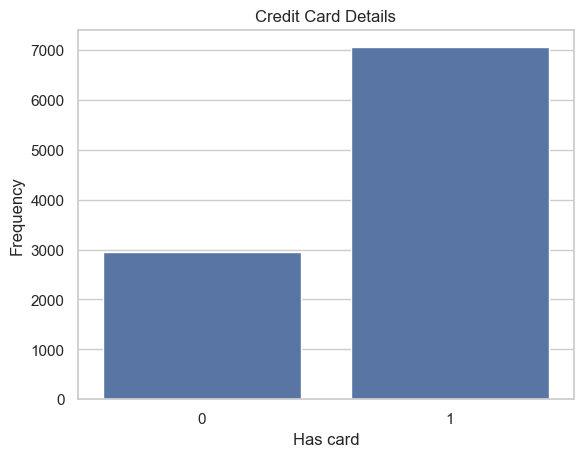

In [77]:
crcard = data['HasCrCard']
sns.countplot(x='HasCrCard', data=data)
plt.title('Credit Card Details')
plt.xlabel('Has card')
plt.ylabel('Frequency')
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [79]:
data = pd.get_dummies(data, columns=['Geography'])
data

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [80]:
data['Geography_France'] = le.fit_transform(data['Geography_France'])
data['Geography_Germany'] = le.fit_transform(data['Geography_Germany'])
data['Geography_Spain'] = le.fit_transform(data['Geography_Spain'])
data

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [81]:
data = data.drop('RowNumber', axis=1)
data = data.drop('Surname', axis=1)
data = data.drop('CustomerId', axis=1)
feature_cols1 = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']
data[feature_cols1], data['Exited']

(      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0             619       0   42       2       0.00              1          1   
 1             608       0   41       1   83807.86              1          0   
 2             502       0   42       8  159660.80              3          1   
 3             699       0   39       1       0.00              2          0   
 4             850       0   43       2  125510.82              1          1   
 ...           ...     ...  ...     ...        ...            ...        ...   
 9995          771       1   39       5       0.00              2          1   
 9996          516       1   35      10   57369.61              1          1   
 9997          709       0   36       7       0.00              1          0   
 9998          772       1   42       3   75075.31              2          1   
 9999          792       0   28       4  130142.79              1          1   
 
       IsActiveMember  EstimatedSalary

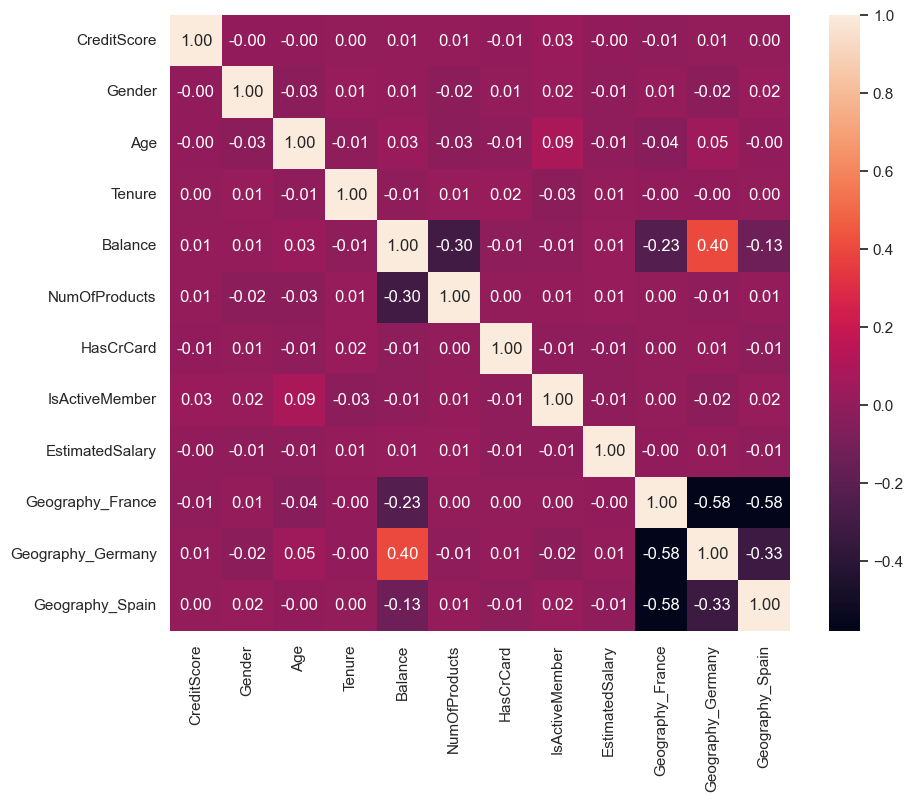

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[feature_cols1].corr(), annot=True, fmt=".2f")
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
X = data[feature_cols1]  
y = data['Exited']  
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['CreditScore', 'Balance', 'EstimatedSalary']
data[cols] = scaler.fit_transform(data[cols])
data[feature_cols1]


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0,42,2,-1.225848,1,1,1,0.021886,1,0,0
1,-0.440036,0,41,1,0.117350,1,0,1,0.216534,0,0,1
2,-1.536794,0,42,8,1.333053,3,1,0,0.240687,1,0,0
3,0.501521,0,39,1,-1.225848,2,0,0,-0.108918,1,0,0
4,2.063884,0,43,2,0.785728,1,1,1,-0.365276,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,39,5,-1.225848,2,1,0,-0.066419,1,0,0
9996,-1.391939,1,35,10,-0.306379,1,1,1,0.027988,1,0,0
9997,0.604988,0,36,7,-1.225848,1,0,1,-1.008643,1,0,0
9998,1.256835,1,42,3,-0.022608,2,1,0,-0.125231,0,1,0


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()

In [89]:
lr.fit(X_train, Y_train)

c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [91]:
svc.fit(X_train, Y_train)

SVC()

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import classification_report
def evaluate_metrics(yt, yp):
    result_pos = {}
    result_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    result_pos['precision'] = precision
    result_pos['recall'] = recall
    result_pos['f1_score'] = f_beta
    return result_pos

In [92]:
lr_pred = lr.predict(X_test)
rfc_pred = rfc.predict(X_test)
svc_pred = svc.predict(X_test)

{'accuracy': 0.799, 'precision': array([0.98367518, 0.07692308]), 'recall': array([0.80645161, 0.54651163]), 'f1_score': array([0.88629078, 0.1348637 ])}


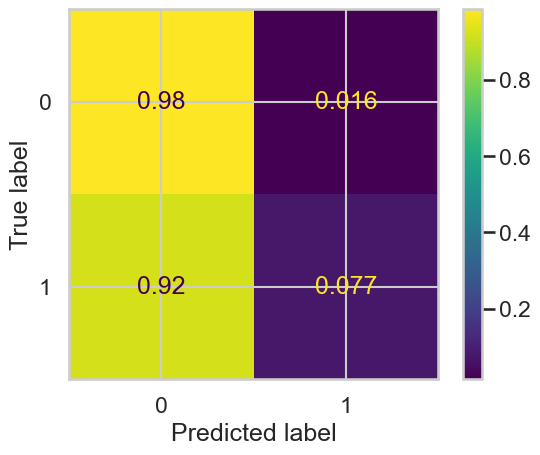

In [94]:
print(evaluate_metrics(lr_pred, Y_test))
cf = confusion_matrix(Y_test, lr_pred, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=lr.classes_)
disp.plot()
plt.show()

{'accuracy': 0.8673333333333333, 'precision': array([0.96693177, 0.47790507]), 'recall': array([0.87866109, 0.78706199]), 'f1_score': array([0.92068553, 0.59470468])}


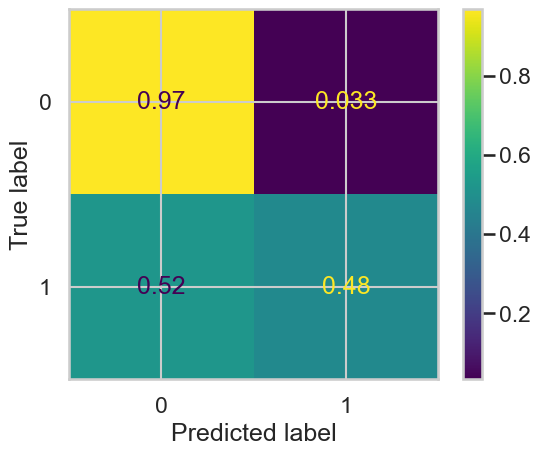

In [96]:
print(evaluate_metrics(rfc_pred, Y_test))
cf = confusion_matrix(Y_test, rfc_pred, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=lr.classes_)
disp.plot()
plt.show()

{'accuracy': 0.7963333333333333, 'precision': array([1., 0.]), 'recall': array([0.79633333, 0.        ]), 'f1_score': array([0.88662089, 0.        ])}


c:\Users\mraga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


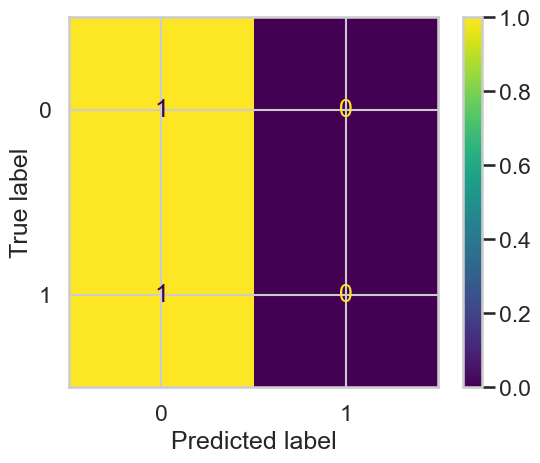

In [97]:
print(evaluate_metrics(svc_pred, Y_test))
cf = confusion_matrix(Y_test, svc_pred, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=lr.classes_)
disp.plot()
plt.show()